<a href="https://www.kaggle.com/code/yogita19/home-loan-prediction?scriptVersionId=247611552" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


## Student Name : Yogita Wankhede
## Project Title : Home Loan Approval 

## **1.Bussiness Understanding:**
 #### 1. Problem Statement : The main problem we are addressing is that we don't know who are applicable for home loan.So to solve this problem we automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.
 #### 2.In our data "LOAN STATUS" column is our target variable and all other remening columns like 'Gender','Married','Dependents','Education','Self Employed','Applicant Income','Coapplicant Income','Loan amount','Loan Amount Term','Credit History' and 'property Area' are features(Independent variables) to be used to predict the result. 
 
 #### 3.Our task is of Classification.So for model building we use SVM model and logistic Regression model and Random Forest Model.

## **2.Data Understanding**

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#1.load data set  
df= pd.read_csv('/kaggle/input/home-loan-approval/loan_sanction_train.csv')

#2.show top 5 rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Observation: We load the data set (Home Loan approval) and show its top 5 rowas.

In [4]:
# checking number of rows and columns 
df.shape

(614, 13)

#### Observation: We have 614 rows and 13 columns in our data set.

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Observation : we have int,float and object types of data in our data set

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df.drop('Loan_ID', axis=1, inplace= True)
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#checking data types of each column
df.info()

In [16]:
df['ApplicantIncome'].count()

614

In [13]:
#generate summary statistics for each column
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
df['LoanAmount'].min()

9.0

In [18]:
df['LoanAmount'].max()

700.0

#### Observations:Loan Amount is positivly correlated with Applicant income , Coapplicant income , loan amount terms and loan amount is negativly correlated with Credit history. 


In [19]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## 3.EDA

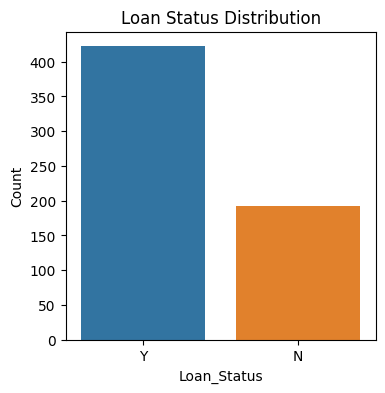

In [20]:
#visualizing the class distribution for target variable(our target variable is loan status)
plt.figure(figsize=(4,4))
sns.countplot(x='Loan_Status',data=df)
plt.title('Loan Status Distribution')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()

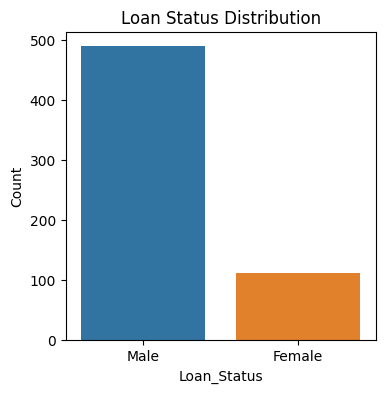

In [21]:
plt.figure(figsize=(4,4))
sns.countplot(x='Gender',data=df)
plt.title('Loan Status Distribution')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()

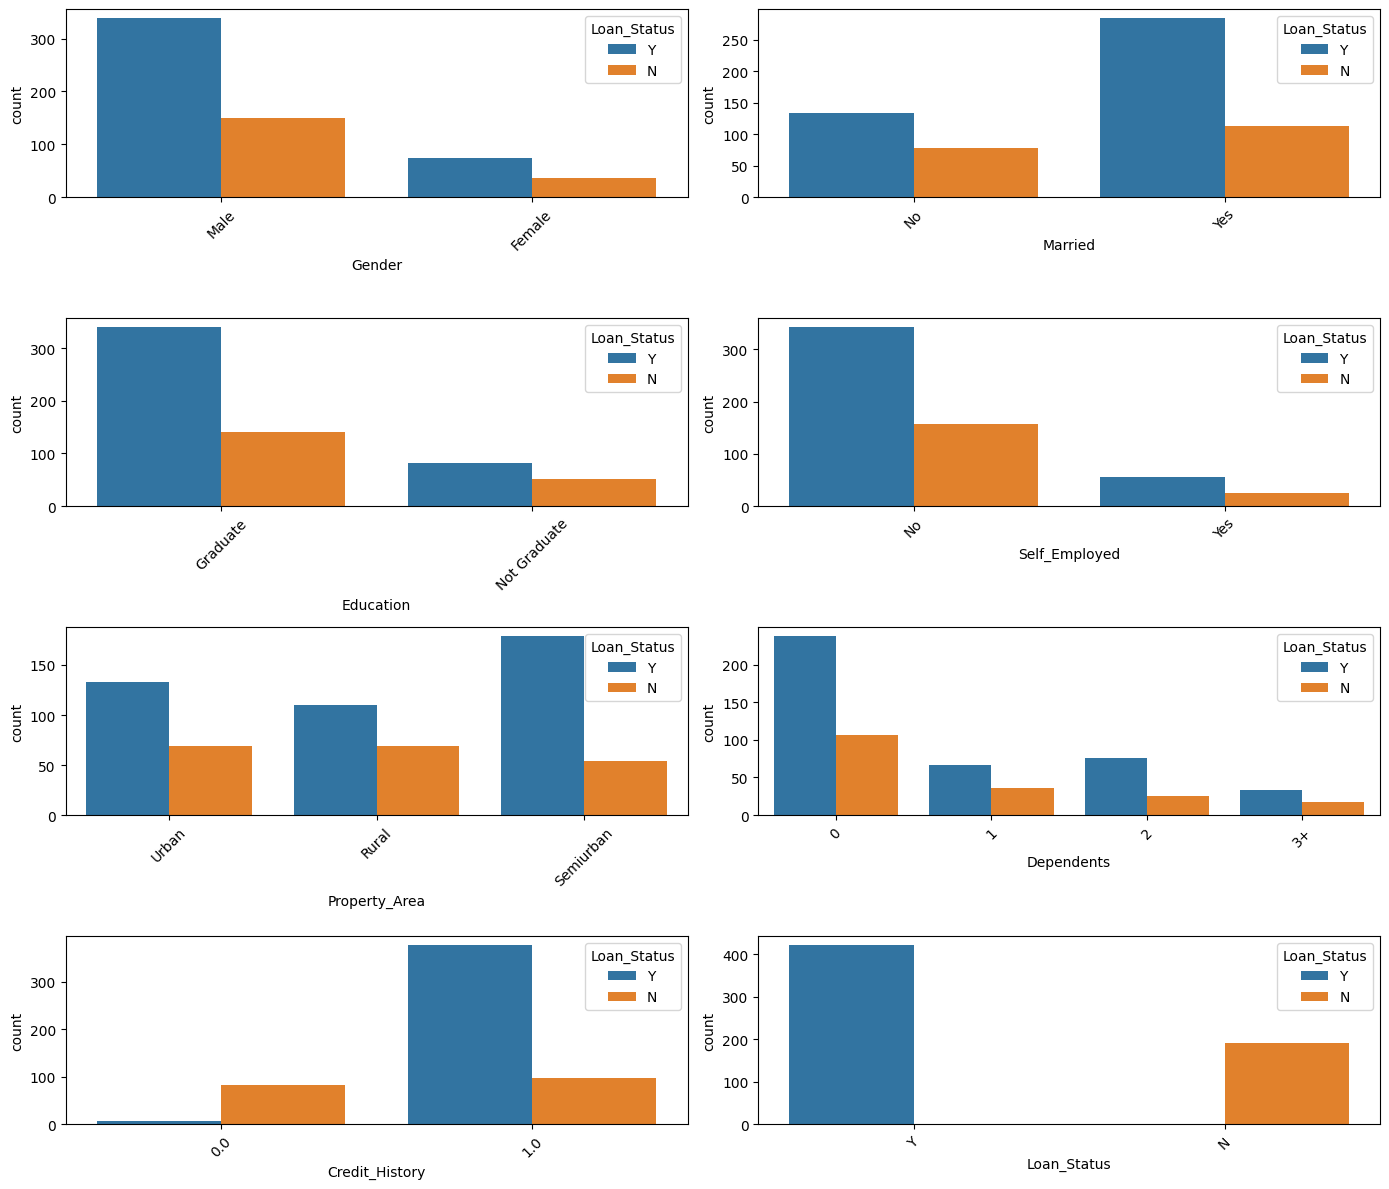

In [22]:
# barplot for categorical variables
cat_cols = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents','Credit_History','Loan_Status']
plt.figure(figsize=(14,12))
for i,col in enumerate(cat_cols,1):
    plt.subplot(4,2,i)
    sns.countplot(x=col,hue='Loan_Status', data=df)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


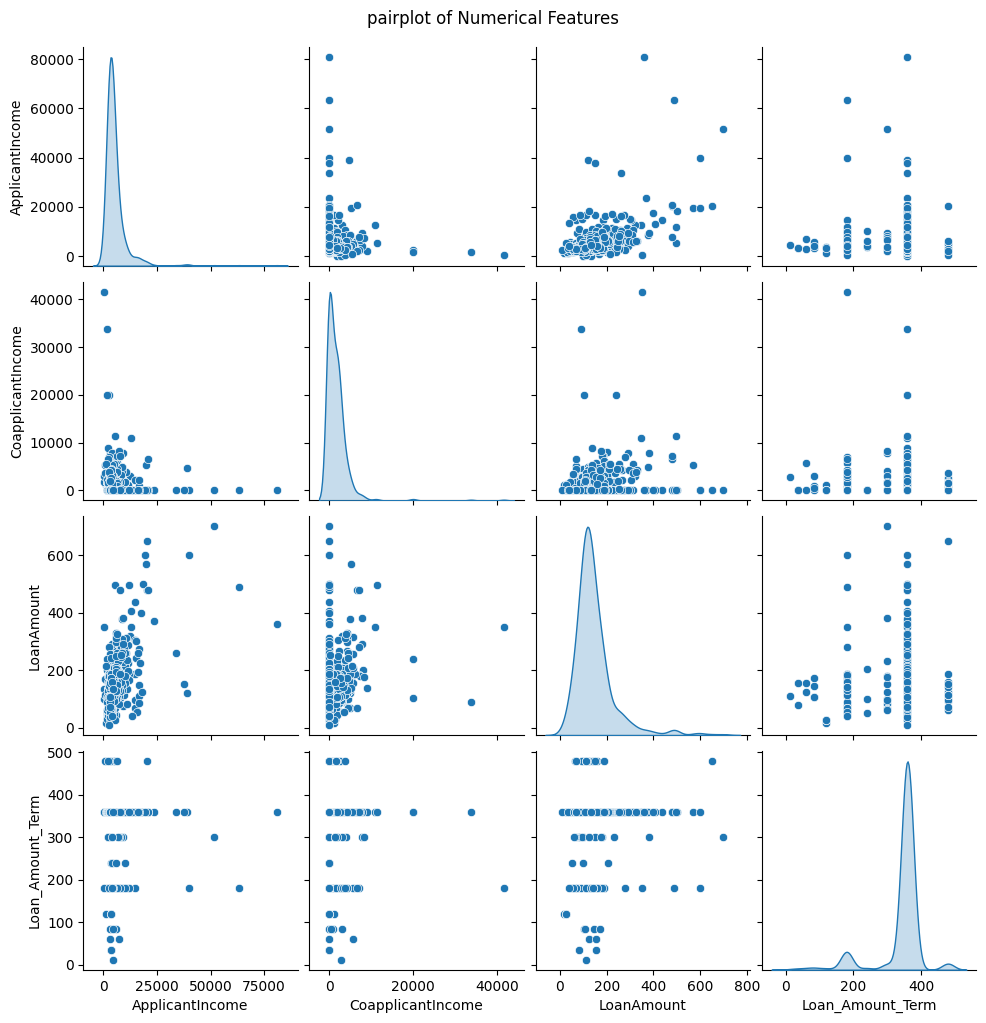

In [24]:
#pairplot for numerical variables ( for finding pairwise relationship between the numerical variables)
num_cols =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
sns.pairplot(df[num_cols],diag_kind='kde')
plt.suptitle('pairplot of Numerical Features',y=1.02)
plt.show()

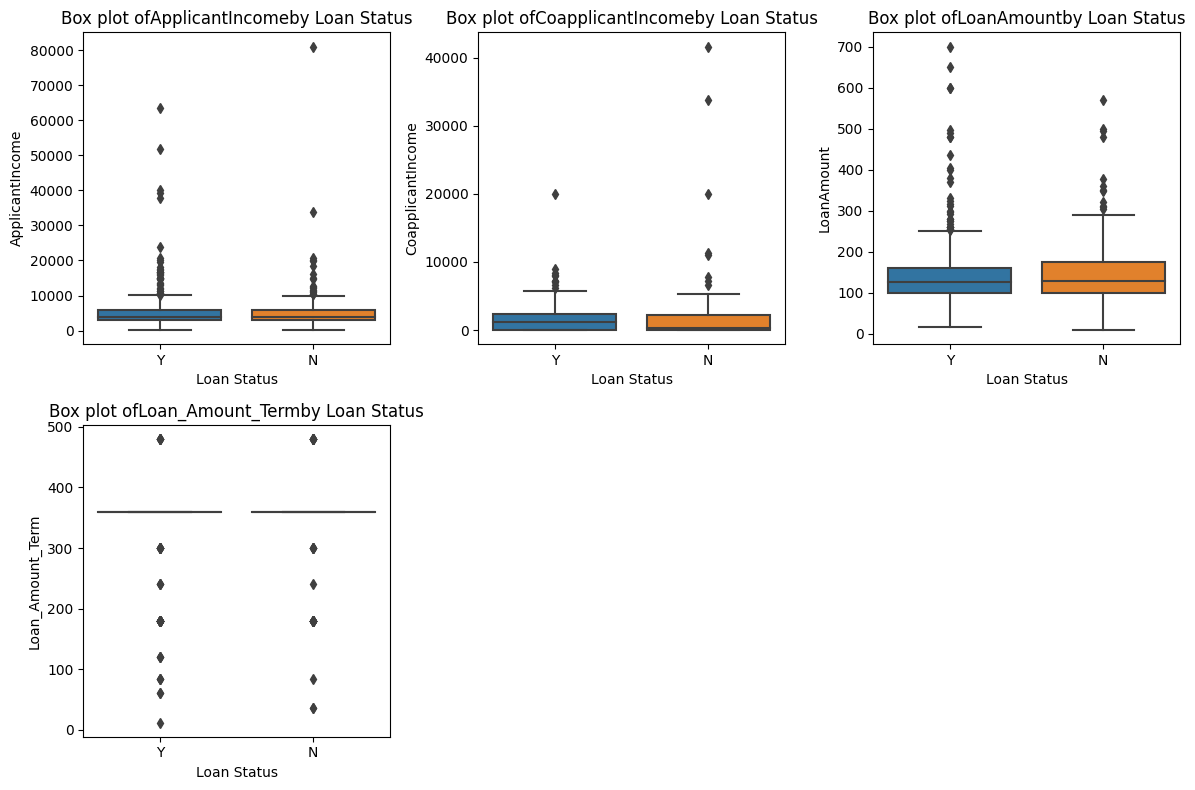

In [25]:
# boxplot (for outlier detection in numerical features)
plt.figure(figsize=(12,8))
for i,col in enumerate(num_cols,1):
    plt.subplot(2,3,i)
    sns.boxplot(x='Loan_Status',y=col, data = df)
    plt.title(f'Box plot of{col}by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

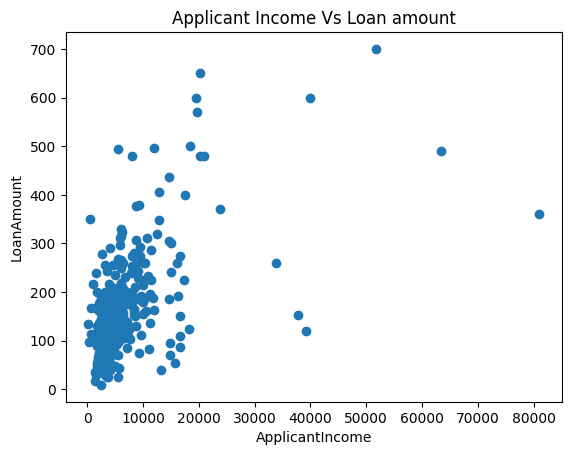

In [27]:
#scatterplot
plt.scatter(df['ApplicantIncome'],df['LoanAmount'])
plt.title("Applicant Income Vs Loan amount")
plt.xlabel("ApplicantIncome")
plt.ylabel("LoanAmount")
plt.show()


In [29]:
#generating correlation matrix 
print('Correlation')
display(df.corr(numeric_only=True))

Correlation


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


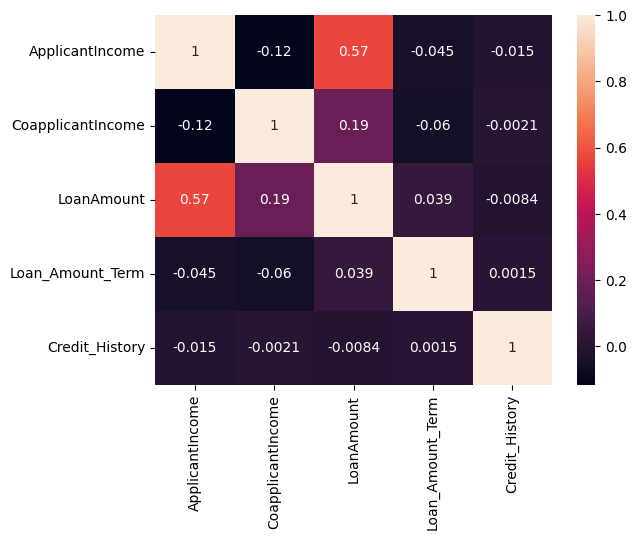

In [28]:
#correlation matrics
sns.heatmap(df.corr(numeric_only = True),annot=True)
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


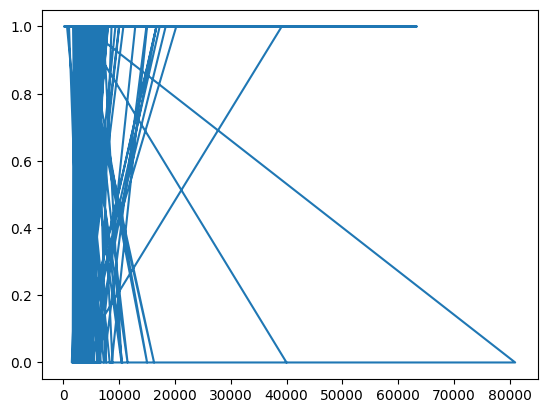

In [35]:
plt.plot(df['ApplicantIncome'],df['Credit_History'])
plt.show()

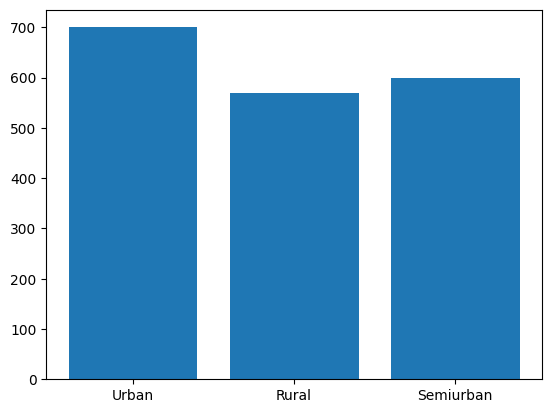

In [43]:
bar = plt.bar(df['Property_Area'],df['LoanAmount'])
plt.show()

#### Observations:
##### 1. There is high possiblity of Male to get Loan.
##### 2.Male who are married , graduate and zero depndents also have high possiblity of get the loan.
##### 3.Self Employed have less possiblity of get the loan.
##### 4.Some Outliers are detected in our data.

ValueError: could not convert string to float: 'Male'

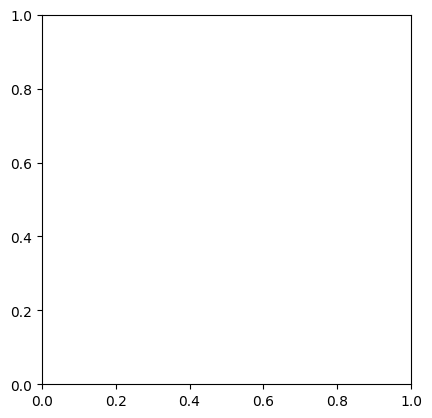

In [41]:
plt.pie(x=df['Gender'])
plt.show()

NameError: name 'counts' is not defined

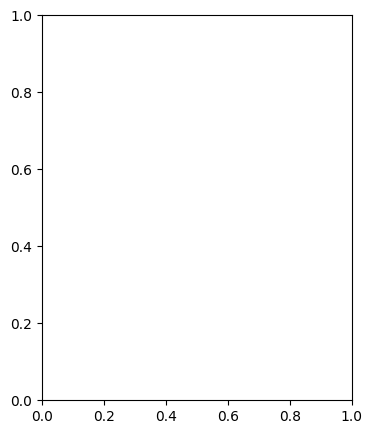

In [45]:
bar,ax= plt.subplots(figsize=(4,5)) 
ax = plt.pie(x = 'Gender', labels=counts.keys(),autopct='%.0f%%') 
plt.title("Loan Approved", fontsize=17) 
plt.show()

## 4.Data Preparation

In [ ]:
(df.isnull().sum()/(len(df)))*100

#### Observation : We have missing values in  columns Gender , Married, Dependents, Self Employed, Loan Amount, Loan amount Term and Credit history 

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
#separating the into features(X)  and target(Y)
X = df.drop(columns=['Loan_Status'],axis=1)
Y = df['Loan_Status']

In [ ]:
print(X)
print(Y)

In [ ]:
#data spliting into train and test
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

In [ ]:
#defining categorical and numerical features
categorical_features=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History','Loan_Status']
numerical_features=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [ ]:
from sklearn.pipeline import Pipeline
#preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scalar',StandardScaler())])

#preprocessing for categorical data
categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown ='ignore'))])

preprocessor= ColumnTransformer(
    transformers=[
    ('num',numerical_transformer,numerical_features),
    ('cat',categorical_transformer,numerical_features)])

preprocessor 

#### **Observations** :
#### 1.Split the data into train and test.
#### 2.Define the numerical data and categorical data and then create a pipeline .

### Model Selection
#### 1.Support Vector Machine

In [ ]:
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]

for classifier_name, classifier in classifiers:
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
  # Perform cross-validation on the training data
    cross_val_scores = cross_val_score(model, X_train, y_train, cv=4, scoring='accuracy')
    print(classifier_name)
    print(f"Cross-Validation Scores: {cross_val_scores}")
    print(f"Mean Cross-Validation Score: {np.mean(cross_val_scores)}\n")
    

#### 

#### 1.Our Data set is of Classification so we perform SVM , Logistic Regression and Random Forest model 
#### 2.SVM's Mean CV Score = 0.68
#### 3.Logistics  Mean CV Score = 0.67 
#### 4.Random Forest  Mean CV Score = 0.67